In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from ipynb.fs.full.Functions import regressionLine

ModuleNotFoundError: No module named 'ipynb'

In [2]:
master_df = pd.read_csv('resources/MasterData200725.csv')
master_df = master_df.drop(columns="Unnamed: 0")

In [3]:
def regressionLine(x,y, text_place_x, text_place_y):

    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    print("R-squared: %f" % r_value**2)
    plt.plot(x, intercept + slope*x, 'r', label='regression line')
    plt.text(text_place_x, text_place_y, f'y = {round(slope,3)}x + {round(intercept,3)}', color = 'red', fontsize = 12)
    plt.legend()

In [4]:
def scatterDraw(xValue, frame, color):
    plt.figure(figsize=(14, 6))
    plt.scatter(frame[xValue], 
            master_df["Mortality Rate"], 
            color=color)
    plt.xlabel(xValue)
    plt.ylabel('COVID Mortality Ratio-(Positive Cases / Deaths)')

R-squared: 0.099553


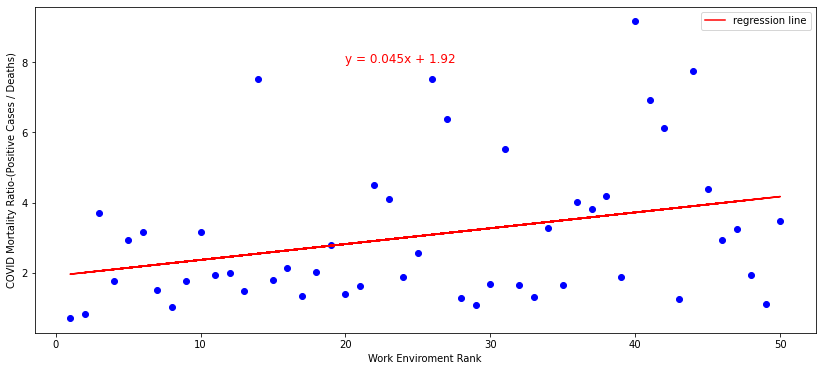

In [5]:
scatterDraw("Work Enviroment Rank", master_df, 'blue')
regressionLine(master_df["Work Enviroment Rank"], 
            master_df["Mortality Rate"], 20, 8)
plt.show()

R-squared: 0.049195


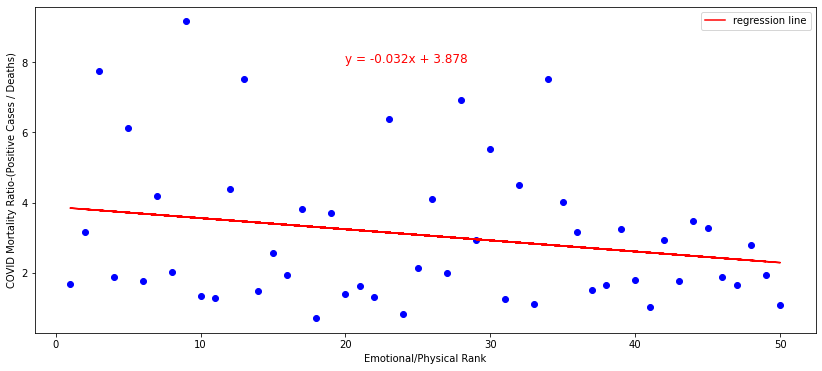

In [6]:
scatterDraw("Emotional/Physical Rank", master_df, 'blue')
regressionLine(master_df["Emotional/Physical Rank"], 
            master_df["Mortality Rate"], 20, 8)
plt.show()

R-squared: 0.023049


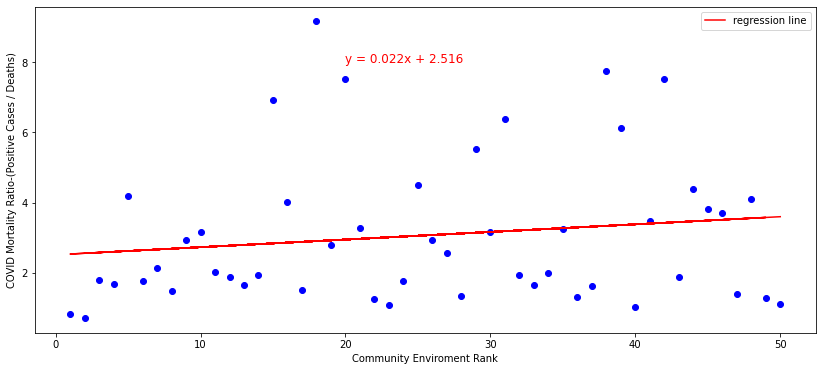

In [7]:
scatterDraw("Community Enviroment Rank", master_df, 'blue')
regressionLine(master_df["Community Enviroment Rank"], 
            master_df["Mortality Rate"], 20, 8)
plt.show()

In [8]:
def stateGrouper(groupByField, num_of_bins, dataFrame):
    dataFrame = dataFrame.sort_values(groupByField)
    dataFrame.index = np.arange(1, len(dataFrame) + 1)
    dataFrame[f'{groupByField}_bin'] = np.ceil(dataFrame.index / (len(dataFrame) / num_of_bins)).astype(int)
    return dataFrame

In [9]:
def boxDraw(groupByField, num_of_bins, dataFrame):
    fig1, ax1 = plt.subplots()
    ticks = [*range(1,num_of_bins+1)]

    collection = []
    labels = ticks
    for box in set(dataFrame[f'{groupByField}_bin']):
        collection_df = dataFrame.loc[(dataFrame[f'{groupByField}_bin'] == box)]
        collection.append(collection_df['Mortality Rate'].tolist())
        
    plt.boxplot(collection, patch_artist=True, flierprops=dict(marker='o', markerfacecolor='r')
                     , medianprops= dict(color='white', linewidth=2)
                     , boxprops = dict(facecolor = '#235574'))
    ax1.set(facecolor = '#c0c0c0' )
    plt.xticks(ticks, labels)

    ax1.set_title(f'{groupByField} vs COVID Mortality')
    ax1.set_ylabel('COVID Mortality Ratio-(Positive Cases / Deaths)')
    ax1.set_xlabel(f'{groupByField}ed State Groups from Best to Worst')

In [13]:
#Use this to split the states in groups.  Function will sort and split into groups based on field passed to the function.
#Also, this is flexible to change the number of state groups by changing the bin_number variable

bin_number = 4
master_df = stateGrouper('Emotional/Physical Rank', bin_number, master_df)
master_df = stateGrouper('Work Enviroment Rank', bin_number, master_df)
master_df = stateGrouper('Community Enviroment Rank', bin_number, master_df)
master_df.head()

,State,Abv,Date,Tested,Positive,Deaths,Mortality Rate,Happiness Rank,totalScore,Emotional/Physical Rank,Work Enviroment Rank,Community Enviroment Rank,Emotional/Physical Rank_bin,Work Enviroment Rank_bin,Community Enviroment Rank_bin
1,Idaho,ID,2020-07-25 07:10:21,62642.0,17264.0,144.0,0.834106,6,63.09,24,2,1,2,1,1
2,Utah,UT,2020-07-22 05:16:54,561500.0,35012.0,251.0,0.716897,2,67.84,18,1,2,2,1,1
3,Nevada,NV,2020-07-22 05:16:54,503464.0,37528.0,676.0,1.801322,26,51.80,40,15,3,4,2,1
4,Hawaii,HI,2020-07-22 05:16:54,108182.0,1418.0,24.0,1.692525,1,68.27,1,30,4,1,3,1
5,Maryland,MD,2020-07-25 07:10:21,804350.0,81766.0,3422.0,4.185114,7,61.78,7,38,5,1,4,1


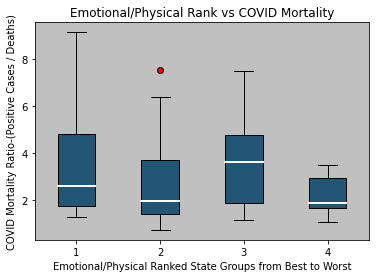

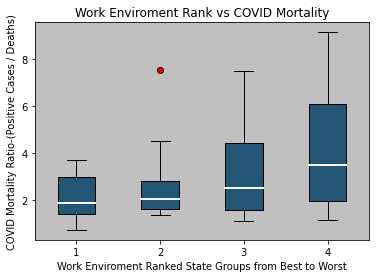

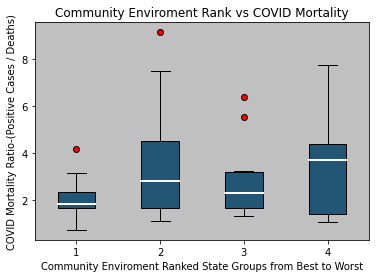

In [14]:
#This will draw the boxplots for any previously binned collection of data at the field level.
box = boxDraw('Emotional/Physical Rank', bin_number, master_df)
box2 = boxDraw('Work Enviroment Rank', bin_number, master_df)
box3 = boxDraw('Community Enviroment Rank', bin_number, master_df)
plt.show()

In [12]:
#I will check more code in tomorrow that starts the stats tests on the means of the buckets
#to see if there is anything more we can glean from the data.

emot_bin = master_df.groupby(['Emotional/Physical Rank_bin'])['Mortality Rate'].mean()
emot_bin_df = pd.DataFrame(emot_bin)
emot_bin_df

,Mortality Rate
Emotional/Physical Rank_bin,
1,3.794533
2,3.884405
3,2.258217
4,3.385339
5,3.846710
6,2.198100
7,2.238196


In [13]:
#Start t-test with binned groups of state data